In [1]:
import matplotlib.pyplot as plt

In [2]:
data=[{
    "id": 1804020,
    "text": "This is the best!!!"
},{
    "id": 1804043,
    "text": "Nice, yet not a HUGE fan"
},{
    "id": 1804165,
    "text": "this is quite nice"
},{
    "id": 1804019,
    "text": "trying to find better alternatives"
},{
    "id": 1804017,
    "text": "this is quite nice"
}]
data

[{'id': 1804020, 'text': 'This is the best!!!'},
 {'id': 1804043, 'text': 'Nice, yet not a HUGE fan'},
 {'id': 1804165, 'text': 'this is quite nice'},
 {'id': 1804019, 'text': 'trying to find better alternatives'},
 {'id': 1804017, 'text': 'this is quite nice'}]

In [3]:
ids=[]
for i in range(len(data)):
    ids.append(data[i]["id"])
ids

[1804020, 1804043, 1804165, 1804019, 1804017]

In [11]:
import re

corpus=[]
for i in range(len(data)):
    text=data[i]["text"].lower();
    text=re.sub('[^a-z0-9]',' ',text);
    text=re.sub(' +',' ',text);
    corpus.append(text);
corpus

['this is the best ',
 'nice yet not a huge fan',
 'this is quite nice',
 'trying to find better alternatives',
 'this is quite nice']

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=5000)
x=cv.fit_transform(corpus).toarray()
x

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [6]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
coordinates=pca.fit_transform(x)
coordinates

array([[-0.59138514, -0.71882009],
       [ 0.45165172,  1.90131104],
       [-0.92321887, -0.1829936 ],
       [ 1.98617117, -0.81650375],
       [-0.92321887, -0.1829936 ]])

In [7]:
distance_threshold=((10/100)*x.shape[1])**0.5
distance_threshold

1.224744871391589

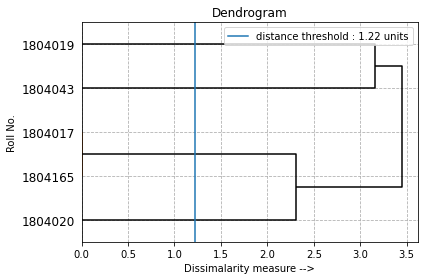

In [8]:
import scipy.cluster.hierarchy as sch

dendogram=sch.dendrogram(sch.linkage(x,method='ward'),labels=ids,orientation='right',color_threshold=distance_threshold,above_threshold_color='black')

plt.axvline(distance_threshold,label='distance threshold : {0:0.2f} units'.format(distance_threshold))#,color='red')
plt.legend()
plt.title('Dendrogram')
plt.xlabel('Dissimalarity measure -->')
plt.ylabel('Roll No.')
plt.grid(b='true',linestyle='--')
plt.tight_layout()
plt.savefig('dendro.png',dpi=500,pad_inches=10)

In [9]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=None,affinity='euclidean',linkage='ward',distance_threshold=distance_threshold)
y_pred=hc.fit_predict(x)
y_pred

array([3, 2, 0, 1, 0], dtype=int64)

In [10]:
data1=[]
for i in range(len(data)):
    d={
        "id": data[i]["id"],
        "cluster": y_pred[i],
        "coordinate": coordinates[i].tolist()
    }
    data1.append(d)
print(data1)

[{'id': 1804020, 'cluster': 3, 'coordinate': [-0.5913851401837825, -0.7188200903472619]}, {'id': 1804043, 'cluster': 2, 'coordinate': [0.4516517205071807, 1.9013110425883921]}, {'id': 1804165, 'cluster': 0, 'coordinate': [-0.9232188734905739, -0.18299359934212012]}, {'id': 1804019, 'cluster': 1, 'coordinate': [1.9861711666577486, -0.8165037535568901]}, {'id': 1804017, 'cluster': 0, 'coordinate': [-0.9232188734905741, -0.1829935993421203]}]
